In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
%matplotlib widget

from Zeros import *

In [2]:
w = 500 * (10 ** -9)

In [3]:
def matrix_points(p):
    #x son los puntos sobre el eje x
    x = list(np.array(p)[:,0])
    y = list(np.array(p)[:,1])
    
    #subm_1 es la submatriz compuesta de vectores fila de x
    subm_1x = np.array(x*len(x)).reshape(len(x),len(x))
    subm_1y = np.array(y*len(y)).reshape(len(y),len(y))
    
    #subm_2 es la submatriz compuesta de vectores columna repitiendo x
    subm_2x = np.transpose(subm_1x)
    subm_2y = np.transpose(subm_1y)
    
    #xi_a es el promedio de cada punto en x con cada uno de los demas puntos
    xi_a = (subm_1x+subm_2x)/2
    eta_a = (subm_1y+subm_2y)/2
    
    #xi_d es la distancia de cada punto con cada uno de los demas puntos
    xi_d = subm_2x-subm_1x
    eta_d = subm_2y-subm_1y
    
    #vectores de las matrices xi_a y xi_d
    xi_av = list(xi_a.reshape(1,len(xi_a)**2))
    xi_dv = list(xi_d.reshape(1,len(xi_d)**2))
    eta_av = list(eta_a.reshape(1,len(eta_a)**2))
    eta_dv = list(eta_d.reshape(1,len(eta_d)**2))
    
    #matriz con todas las parejas de puntos xi_a y xi_d
    xi_m = np.transpose(np.array(xi_av+xi_dv+eta_av+eta_dv)).reshape(len(x),len(x),4)
    return xi_m

In [4]:
def radio(xi_a, xi_d, eta_a, eta_d, wa, R1, R2):
    #constantes
    k = ((2*np.pi)/wa)
    n = 1.5 #refractive index
    
    xi_p, xi_n = xi_a+(xi_d)/2, xi_a-(xi_d)/2
    eta_p, eta_n = eta_a+(eta_d)/2, eta_a-(eta_d)/2
    
    normPlus  = (xi_p**2) + (eta_p**2)
    normMinus = (xi_n**2) + (eta_n**2)
    
    
    # fase dentro y fuera de la lente para +
    if (normPlus > (R1 ** 2)) or (normPlus > (R2 ** 2)):
        phase_plus = 0
    else:
        phase_plus  = R1 * np.sqrt(1 - (normPlus / (R1 ** 2)) + 0j) - R2 * np.sqrt(1 - (normPlus / (R2 ** 2)) + 0j)
        
    # fase dentro y fuera de la lente para -
    if (normMinus > (R1 ** 2)) or (normMinus > (R2 ** 2)):
        phase_minus = 0
    else:
        phase_minus = R1 * np.sqrt(1 - (normMinus / (R1 ** 2)) + 0j) - R2 * np.sqrt(1 - (normMinus / (R2 ** 2)) + 0j)
    
    phase = np.exp(1j*(n-1)*k*phase_plus) * np.exp(-1j*(n-1)*k*phase_minus)
    
    
    phase_real = np.real(phase) 
    return phase_real

In [5]:
a = w
points_v = np.array([[0,0],[a,0]])*1.089724735888305e-06 

print(matrix_points(points_v))

radio(0, 0, 0, 0, w, 5, -5), radio(2.72431184e-13, -5.44862368e-13, 0, 0, w, 5, -5), radio(2.72431184e-13, 5.44862368e-13, 0, 0, w, 5, -5), radio(5.0e-07, 0, 0, 0, w, 5, -5)

[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 2.72431184e-13 -5.44862368e-13  0.00000000e+00  0.00000000e+00]]

 [[ 2.72431184e-13  5.44862368e-13  0.00000000e+00  0.00000000e+00]
  [ 5.44862368e-13  0.00000000e+00  0.00000000e+00  0.00000000e+00]]]


(1.0, 1.0, 1.0, 0.9999999999999999)

In [6]:
def radio_im(rho_minus, m):
    
    w = 500 * (10 ** -9)
    k = (2 * np.pi)/ w
    n = 1.5
    Delta0 = 0*w
    r1 = 5*w
    r2 = -5*w
    
    fase = (2*m+1) * (np.pi /2)
    #fase = m * np.pi
    
    rho_plus = 0
    
    grosor = k * n * Delta0
    #grosor = 0
    
    geometria_plus  = k * (n-1) * (r2 - r1 + r1*np.sqrt(1- ((rho_plus **2)/(r1**2)) ) - r2*np.sqrt(1- ((rho_plus **2)/(r2**2)) ))
    geometria_minus = k * (n-1) * (r2 - r1 + r1*np.sqrt(1- ((rho_minus**2)/(r1**2)) ) - r2*np.sqrt(1- ((rho_minus**2)/(r2**2)) ))
    
    fun = grosor - fase + (geometria_plus - geometria_minus)
    return fun

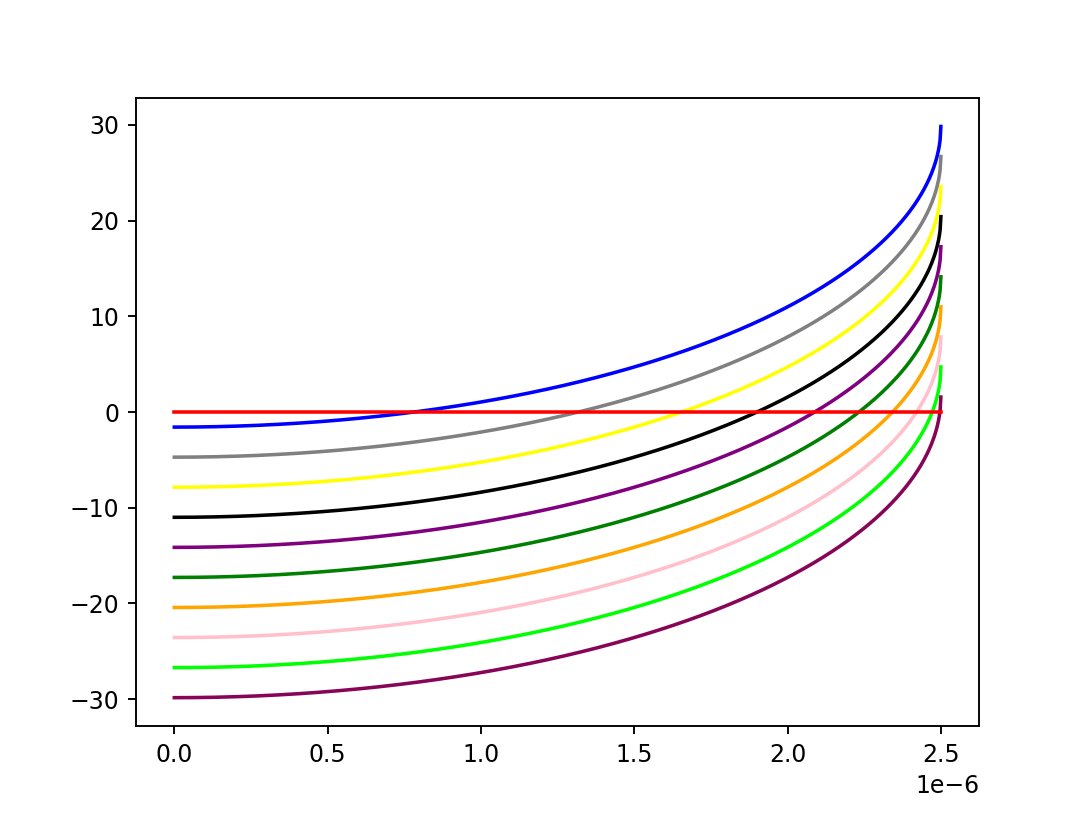

In [7]:
x = np.linspace(0*w, 5*w, 1000)
y = radio_im(x, 0)
y_1 = radio_im(x, 1)
y_2 = radio_im(x, 2)
y_3 = radio_im(x, 3)
y_4 = radio_im(x, 4)
y_5 = radio_im(x, 5)
y_6 = radio_im(x, 6)
y_7 = radio_im(x, 7)
y_8 = radio_im(x, 8)
y_9 = radio_im(x, 9)

y_zero = y*0

fig, ax = plt.subplots(dpi=170)

ax.plot(x, y, color='blue')
ax.plot(x, y_1, color='gray')
ax.plot(x, y_2, color='yellow')
ax.plot(x, y_3, color='black')
ax.plot(x, y_4, color='purple')
ax.plot(x, y_5, color='green')
ax.plot(x, y_6, color='orange')
ax.plot(x, y_7, color='pink')
ax.plot(x, y_8, color='#00FF00')
ax.plot(x, y_9, color='#880456')

ax.plot(x, y_zero, color='red')

#plt.savefig('bFresnel.png')

plt.show()

In [8]:
def A1(rho):
    func = radio_im(rho, 0)
    
    return func

def A2(rho):
    func = radio_im(rho, 1)
    
    return func

def A3(rho):
    func = radio_im(rho, 2)
    
    return func

def A4(rho):
    func = radio_im(rho, 3)
    
    return func

def A5(rho):
    func = radio_im(rho, 4)
    
    return func

def A6(rho):
    func = radio_im(rho, 5)
    
    return func

def A7(rho):
    func = radio_im(rho, 6)
    
    return func

def A8(rho):
    func = radio_im(rho, 7)
    
    return func

In [9]:
#rho_1 = Newton(A1, 0.8*(10**-6))
rho_2 = Newton(A2, 0.8*(10**-6))
rho_3 = Newton(A3, 1.76*(10**-6))
rho_4 = Newton(A4, 1.76*(10**-6))
rho_5 = Newton(A5, 1.76*(10**-6))
rho_6 = Newton(A6, 2.3*(10**-6))
rho_7 = Newton(A7, 2.3*(10**-6))
rho_8 = Newton(A8, 2.497*(10**-6))

print('Radio 1: ', rho_2, '\n', 'Radio 2: ', rho_3, '\n', 'Radio 3: ', rho_4)
print('Radio 4: ', rho_5, '\n', 'Radio 5: ', rho_6, '\n', 'Radio 6: ', rho_7, '\n', 'Radio 7: ', rho_8)

Radio 1:  1.3169567191065932e-06 
 Radio 2:  1.6535945694153695e-06 
 Radio 3:  1.8998355191963336e-06
Radio 4:  2.0879116360612585e-06 
 Radio 5:  2.23257138743647e-06 
 Radio 6:  2.3418742493994e-06 
 Radio 7:  2.420614591379636e-06


In [10]:
def radio_real(rho_minus, m):
    
    w = 500 * (10 ** -9)
    k = (2 * np.pi)/ w
    n = 1.5
    Delta0 = 0*w
    r1 = 5*w
    r2 = -5*w
    
    #fase = (2*m+1) * (np.pi /2)
    fase = m * np.pi
    
    rho_plus = 0
    
    grosor = k * n * Delta0
    #grosor = 0
    
    geometria_plus  = k * (n-1) * (r2 - r1 + r1*np.sqrt(1- ((rho_plus **2)/(r1**2)) ) - r2*np.sqrt(1- ((rho_plus **2)/(r2**2)) ))
    geometria_minus = k * (n-1) * (r2 - r1 + r1*np.sqrt(1- ((rho_minus**2)/(r1**2)) ) - r2*np.sqrt(1- ((rho_minus**2)/(r2**2)) ))
    
    fun = grosor - fase + (geometria_plus - geometria_minus)
    return fun

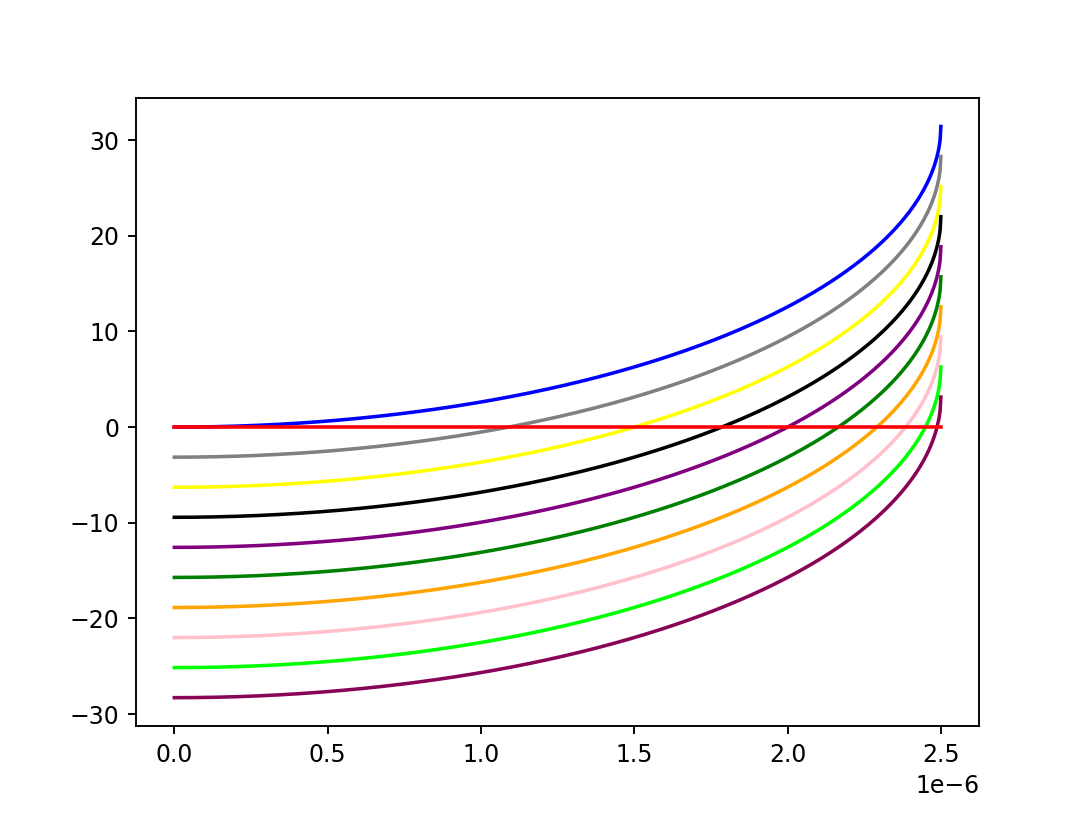

In [11]:
x = np.linspace(0*w, 5*w, 1000)
y = radio_real(x, 0)
y_1 = radio_real(x, 1)
y_2 = radio_real(x, 2)
y_3 = radio_real(x, 3)
y_4 = radio_real(x, 4)
y_5 = radio_real(x, 5)
y_6 = radio_real(x, 6)
y_7 = radio_real(x, 7)
y_8 = radio_real(x, 8)
y_9 = radio_real(x, 9)

y_zero = y*0

fig, ax = plt.subplots(dpi=170)

ax.plot(x, y, color='blue')
ax.plot(x, y_1, color='gray')
ax.plot(x, y_2, color='yellow')
ax.plot(x, y_3, color='black')
ax.plot(x, y_4, color='purple')
ax.plot(x, y_5, color='green')
ax.plot(x, y_6, color='orange')
ax.plot(x, y_7, color='pink')
ax.plot(x, y_8, color='#00FF00')
ax.plot(x, y_9, color='#880456')

ax.plot(x, y_zero, color='red')

#plt.savefig('bFresnel.png')

plt.show()

In [12]:
def A1(rho):
    func = radio_real(rho, 0)
    
    return func

def A2(rho):
    func = radio_real(rho, 1)
    
    return func

def A3(rho):
    func = radio_real(rho, 2)
    
    return func

def A4(rho):
    func = radio_real(rho, 3)
    
    return func

def A5(rho):
    func = radio_real(rho, 4)
    
    return func

def A6(rho):
    func = radio_real(rho, 5)
    
    return func

def A7(rho):
    func = radio_real(rho, 6)
    
    return func

def A8(rho):
    func = radio_real(rho, 7)
    
    return func

In [13]:
rho_1 = Newton(A1, 0.8*(10**-6))
rho_2 = Newton(A2, 0.8*(10**-6))
rho_3 = Newton(A3, 1.76*(10**-6))
rho_4 = Newton(A4, 1.76*(10**-6))
rho_5 = Newton(A5, 1.76*(10**-6))
rho_6 = Newton(A6, 2.3*(10**-6))
rho_7 = Newton(A7, 2.3*(10**-6))
rho_8 = Newton(A8, 2.497*(10**-6))

print('Radio 1: ', rho_1, '\n', 'Radio 2: ', rho_2, '\n', 'Radio 3: ', rho_3, '\n', 'Radio 4: ', rho_4)
print('Radio 5: ', rho_5, '\n', 'Radio 6: ', rho_6, '\n', 'Radio 7: ', rho_7, '\n', 'Radio 8: ', rho_8)

Radio 1:  3.1628506184185346e-12 
 Radio 2:  1.089724735888305e-06 
 Radio 3:  1.500000000000017e-06 
 Radio 4:  1.7853571071357165e-06
Radio 5:  2.0000000000003603e-06 
 Radio 6:  2.1650635094611136e-06 
 Radio 7:  2.2912878474779214e-06 
 Radio 8:  2.3848480035423647e-06
